In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
data = pd.read_csv('Molecular-data.csv')
data

,Molar volume,Density
0,26.379294,5.254
1,25.847969,5.362
2,26.510484,5.228
3,25.737570,5.385
4,25.402642,5.456
5,24.931968,5.559
6,26.612291,5.208
7,26.694301,5.192
8,26.434639,5.243
9,26.495280,5.231


In [3]:
from sklearn import preprocessing

x = np.array([data['Molar volume'].values]).reshape(-1,1)
y = np.array([data['Density'].values]).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
y_scaled = min_max_scaler.fit_transform(y)

In [4]:
normalized_data = pd.DataFrame({'Molar volume': x_scaled.reshape(-1,), 'Density': y_scaled.reshape(-1,)})
normalized_data

,Molar volume,Density
0,0.460039,0.358333
1,0.392154,0.418333
2,0.476801,0.343889
3,0.378049,0.431111
4,0.335257,0.470556
5,0.275121,0.527778
6,0.489808,0.332778
7,0.500286,0.323889
8,0.467111,0.352222
9,0.474858,0.345556


In [5]:
train_dataset = normalized_data.sample(frac=0.8, random_state=0)
test_dataset = normalized_data.drop(train_dataset.index)

In [6]:
train_dataset[:10]

,Molar volume,Density
28,0.463636,0.458889
11,0.286321,0.571667
10,0.331166,0.528333
41,0.630288,0.415556
2,0.476801,0.343889
27,0.525590,0.404444
38,0.898593,0.160000
31,0.803788,0.229444
22,0.450650,0.470556
4,0.335257,0.470556


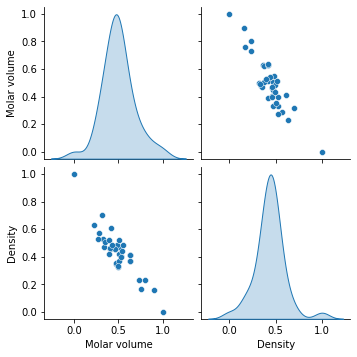

In [7]:
sns.pairplot(train_dataset[['Molar volume', 'Density']], diag_kind='kde')

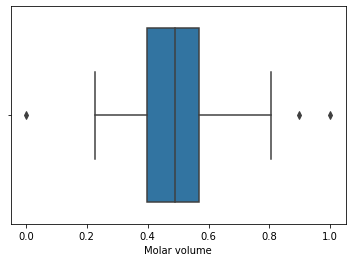

In [8]:
sns.boxplot(x=train_dataset['Molar volume'])

In [9]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Molar volume,40.0,0.497296,0.182811,0.0,0.398747,0.488801,0.569833,1.0
Density,40.0,0.435292,0.160280,0.0,0.369722,0.449722,0.493750,1.0


In [10]:
# Collect input feature for training, molar volume value in this case
train_features = train_dataset.copy() #dataframe type
test_features = test_dataset.copy()

# Collect respective label, density value in this case
train_labels = train_features.pop('Density') # series type
test_labels = test_features.pop('Density')

In [11]:
from sklearn.neural_network import MLPRegressor

In [24]:
regression_model = MLPRegressor(
                                hidden_layer_sizes=(16,32,64),
                                learning_rate_init = 0.001, 
                                random_state=10, 
                                max_iter=500,
                                solver='adam',
                                alpha = 0.2
                                ).fit(train_features, train_labels)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

score_mean = []
score_std = []

split_num = 7

for i in range(2, split_num):
  # create a KFold object with n splits 
  kf = KFold(n_splits = i, shuffle = True, random_state = 10)
  scores = cross_val_score(regression_model, train_features, train_labels, cv=kf)
  m = np.mean(scores)
  s = np.std(scores)
  score_mean.append(m)
  score_std.append(s)
  print('Number of splits: %d, Accuracy: %.3f, Standard Devidation: %.3f' % (i, m, s))

Number of splits: 2, Accuracy: 0.544, Standard Devidation: 0.036
Number of splits: 3, Accuracy: 0.673, Standard Devidation: 0.051
Number of splits: 4, Accuracy: 0.694, Standard Devidation: 0.104
Number of splits: 5, Accuracy: 0.645, Standard Devidation: 0.164
Number of splits: 6, Accuracy: 0.569, Standard Devidation: 0.267


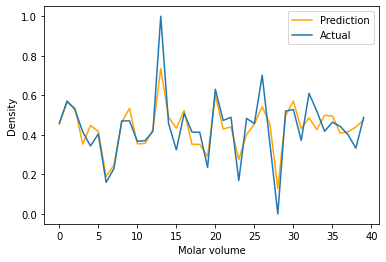

In [26]:
pred_y = regression_model.predict(train_features)
actual_trend=train_labels.values
plt.plot(pred_y, color='orange', label='Prediction')
plt.plot(actual_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()

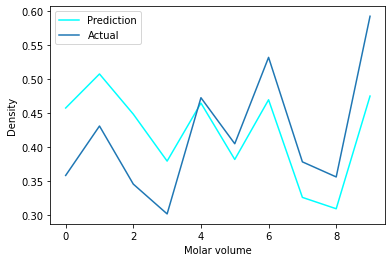

In [27]:
pred_test = regression_model.predict(test_features)
actual_test_trend=test_labels.values
plt.plot(pred_test, color='cyan', label='Prediction')
plt.plot(actual_test_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()

In [28]:
differences = (1 - sum(abs(pred_test - actual_test_trend.reshape(-1,1)))/len(actual_test_trend)) * 100
pred_accuracy = np.mean(differences)
pred_accuracy

91.05295355383876

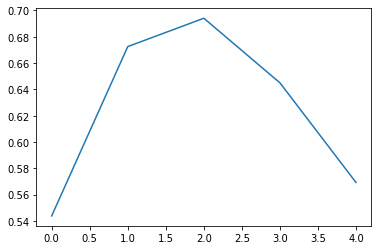

In [29]:
plt.plot(score_mean)